# Linear Regression

In this experiment, we use a simple linear regression to estimate the relationship between Years of Experience and Salary by getting the best fit line.

In [50]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot
import torch

We prepare the data and display it for our reference. In order to use the dataset, download the CSV file from [Kaggle](https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset) and save it to a subfolder called 'Datasets'. 

In [51]:
df = pd.read_csv('Datasets/Salary_Data.csv')
display(df)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Then, we extract the $x$ (Years of Experience), $y$ (Salary), and $n$ (Number of datapoints) values from the pandas dataframe.

In [52]:
x = torch.tensor(df.iloc[0:,0].values)
y = torch.tensor(df.iloc[0:,1].values)
n = df.count(axis=0)[0]

##### Using least squares

We solve for the weight/slope and bias using the least squares method. We used [The Organic Chemistry Tutor](https://www.youtube.com/watch?v=P8hT5nDai6A) as reference for the solution.

In [53]:
ex = sum(x) # Summation of X
ey = sum(y) # Summation of Y
exy = sum(x*y) # Summation of X*Y
ex2 = sum(x*x) # Summation of X^2

w = (n*exy - ex*ey)/(n*ex2 - (ex*ex)) # Slope formula
print(f'Weight/Slope: {w:.3f}')
b = (ey - w*ex)/n # Bias formula
print(f'Bias: {b:.3f}')

Weight/Slope: 9449.962
Bias: 25792.200


After getting the needed values, we plot the actual data points with the line of best fit.

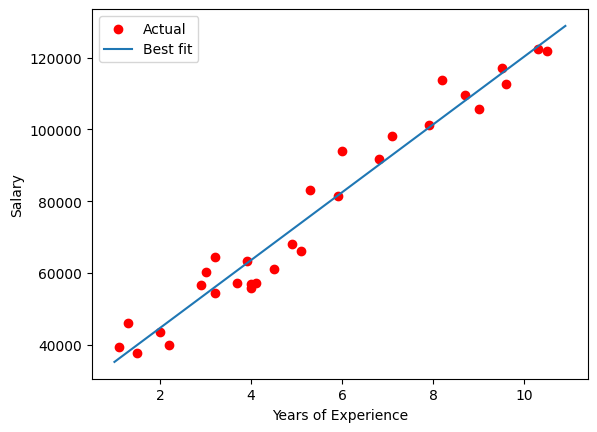

In [54]:
pyplot.scatter(x, y, label='Actual', color='red')

x1 = torch.arange(1, 11, 0.3)
y1 = w*x1 + b
pyplot.plot(x1, y1,label='Best fit')

pyplot.xlabel("Years of Experience")
pyplot.ylabel("Salary")
pyplot.legend()
pyplot.show()

Let us check if the obtained weight and bias terms are similar to when we use scikit-learn's LinearRegression() method. As observed, we have obtained the same values from both methods.

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
print(f'Weight/Slope: {lr.coef_[0]:.3f}')
print(f'Bias: {lr.intercept_:.3f}')

Weight/Slope: 9449.962
Bias: 25792.200


##### Using Gradient Descent
Aside from using the least squares method, we can also look for the weight/slope and bias values through gradient descent. To have a deeper understanding of the mathematics and the intuition behind this method, the [Linear Regression Lecture](https://www.youtube.com/watch?v=4b4MUYve_U8) by Andrew Ng is a great reference. The next code block defines the functions to be used for the algorithm. $h$ returns the linear equation, $J$ is used to compute for the cost function, $d0$ and $d1$ are used to compute for the partial derivatives for the gradient descent, while $gd$ updates the weight/slope and bias terms.

In [56]:
def h(t0, t1, x):
    return t1*x + t0

def J(t0, t1, x, y, m):
    return sum(h(t0, t1, x) - y)/(2*m)

def d0(t0, t1, x, y, m):
    return sum(h(t0,t1,x) - y)/m

def d1(t0, t1, x, y, m):
    return sum((h(t0,t1,x) - y)*x)/m

def gd(lr, t0, t1, x, y, m):
    temp0 = t0 - lr*d0(t0, t1, x, y, m)
    temp1 = t1 - lr*d1(t0, t1, x, y, m)
    return temp0, temp1

We now initialize the weight ($t1$) and bias ($t0$) values, define the number of training examples ($m$), together with the number of epochs ($epochs$) and the learning rate ($lr$).

In [57]:
t0 = 0.
t1 = 1.
m = n
epochs = 1000
lr = 0.05

Finally, we perform the training to find for the weight/slope and bias values. We log the new values along with the cost at every hundredth epoch and at the last epoch. If we observe the cost value, it gradually decreases as we train our regression model. Moreover, although not exactly the same, the final weight and bias values are close to the values obtained from using the least squares method and when using scikit-learn's LinearRegression() function.

In [58]:
print(f'Number of Epochs: {epochs}')
for epoch in range(epochs):
    cost = J(t0, t1, x, y, m)
    if epoch % 100 == 0 or epoch == 999:
        print(f'Epoch {epoch}:')
        print(f'w = {t1:.3f}', end = ' | ')
        print(f'b = {t0:.3f}', end = ' | ')
        print(f'Cost = {cost:.3f}')
    t0, t1 = gd(lr, t0, t1, x, y, m)

print(f'\nWeight/Slope: {t1:.3f}\nBias: {t0:.3f}')

Number of Epochs: 1000
Epoch 0:
w = 1.000 | b = 0.000 | Cost = -37998.843
Epoch 100:
w = 10672.915 | b = 17551.041 | Cost = -871.601
Epoch 200:
w = 9872.287 | b = 22946.268 | Cost = -300.991
Epoch 300:
w = 9595.804 | b = 24809.410 | Cost = -103.942
Epoch 400:
w = 9500.326 | b = 25452.812 | Cost = -35.894
Epoch 500:
w = 9467.355 | b = 25674.999 | Cost = -12.395
Epoch 600:
w = 9455.968 | b = 25751.727 | Cost = -4.281
Epoch 700:
w = 9452.036 | b = 25778.223 | Cost = -1.478
Epoch 800:
w = 9450.679 | b = 25787.374 | Cost = -0.510
Epoch 900:
w = 9450.210 | b = 25790.533 | Cost = -0.176
Epoch 999:
w = 9450.049 | b = 25791.618 | Cost = -0.062

Weight/Slope: 9450.048
Bias: 25791.625
